# 선형회귀 직접 구현

## 데이터셋 준비

 - 사이킷런 임의 회귀 데이터 생성

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 50) 
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.
len(data), data[0].shape, data[1].shape
#X_1 -> data[0] / y_1 -> data[1]

(2, (1000, 1), (1000,))

In [3]:
x_train = data[0]
y_train = data[1]

n_data = len(x_train)
print(n_data, x_train.shape, y_train.shape)

1000 (1000, 1) (1000,)


## Hypothesis, Cost 정의

 - hypothesis: x_train * w1 + w0
 - cost : RSS

## Weight 초기화

In [4]:
w1 = np.random.rand(1)
w0 = np.random.rand(1)
print(w1, w0)

[0.34042083] [0.54286588]


## y_pred 계산

In [5]:
y_pred = w1*x_train.reshape(-1)+w0
y_pred[:5]

array([0.87465339, 0.00858181, 0.62254305, 0.0434712 , 0.02163439])

## cost 계산

 - cost = np.mean((y_train - y_pred) ** 2)

In [6]:
cost = np.mean((y_pred-y_train)**2)
cost

995636.3644843585

## Weight 업데이트

 - w1 = (-1) * np.sum((y_train - y_pred)  * x_train) * 2 / n_data
 - w0 = (-1) * np.sum(y_train - y_pred) * 2 / n_data

In [7]:
y_pred = w1*x_train+w0
cost = np.mean((y_pred.reshape(-1)-y_train)**2)
w3 = (-1)*np.sum((y_train.reshape(-1,1)-y_pred)*x_train)*2/n_data
w2 = (-1)*np.sum(y_train.reshape(-1,1)-y_pred)*2/n_data
w3, w2

(62.564755159498674, -1993.130305750648)

In [8]:
y_pred = w1*x_train.reshape(-1)+w0
w3 = (-1)*np.sum((y_train-y_pred)*x_train.reshape(-1)*2)/n_data
w2 = (-1)*np.sum(y_train-y_pred*2)/n_data
w3, w2

(62.564755159498674, -996.0372377288595)

In [9]:
w1 = np.sum((y_pred - y_train.reshape(-1, 1)) * x_train * 2) / n_data
w0 = np.sum((y_pred - y_train.reshape(-1, 1)) * 2) / n_data
w1, w0

(61921.00517114854, -1993130.3057506478)

## 반복

 - epochs : 반복횟수
 - learning rate : 학습률

 - 출력 지우기
    - from IPython.display import clear_output 
    - clear_output()

In [10]:
epochs = 1000
learning_rate = 0.01

In [11]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 50) 
x_train = data[0]
y_train = data[1]
n_data = len(x_train)
w1 = np.random.rand(1)
w0 = np.random.rand(1)
cost_list=[]

# for i in range(epochs):
#     y_pred = w1*x_train+w0
#     cost = np.mean((y_pred.reshape(-1)-y_train)**2)
#     w1 += learning_rate*((-1)*np.sum((y_pred-y_train.reshape(-1,1))*x_train*2)/n_data)
#     w0 += learning_rate*((-1)*np.sum((y_pred-y_train.reshape(-1,1))*2)/n_data)
#     cost_list.append(cost)
# x_train*w1+w0, y_train

for i in range(epochs):
    y_pred = w1*x_train+w0
    cost = np.mean((y_pred.reshape(-1)-y_train)**2)
    w1 += learning_rate*((-1)*np.sum((y_pred-y_train.reshape(-1,1))*x_train)*2/n_data)
    w0 += learning_rate*((-1)*np.sum((y_pred-y_train.reshape(-1,1)))*2/n_data)
    cost_list.append(cost)
x_train*w1+w0, y_train

(array([[1051.83611245],
        [1006.90148363],
        [1103.8949095 ],
        [1024.05362574],
        [1051.13661261],
        [1034.76519423],
        [ 998.7730684 ],
        [1102.21290494],
        [1026.89228183],
        [ 973.61082102],
        [1073.37528505],
        [ 993.31375559],
        [1214.28226648],
        [1028.01664241],
        [ 900.18568244],
        [ 949.47195425],
        [ 878.65851976],
        [ 966.92066422],
        [ 978.18409918],
        [ 963.59572114],
        [1164.45042763],
        [1050.92690004],
        [1067.78322545],
        [ 990.07118175],
        [ 921.05867804],
        [1043.1852928 ],
        [1030.9357829 ],
        [ 995.96228291],
        [ 995.76681599],
        [1089.15361261],
        [1129.91178366],
        [1050.07804253],
        [ 873.34709539],
        [1024.134661  ],
        [ 778.8497566 ],
        [1024.36229138],
        [ 869.4269191 ],
        [1069.29649344],
        [1039.1652209 ],
        [1083.33283239],


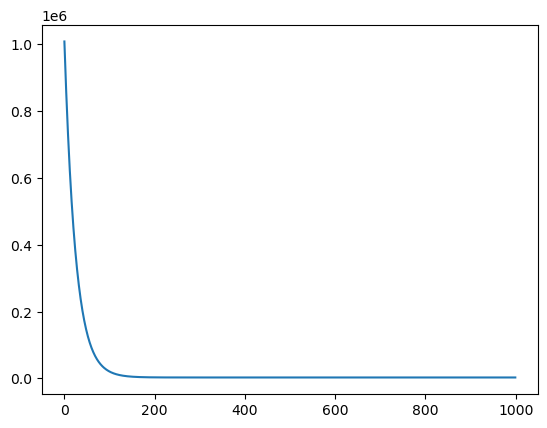

In [12]:
plt.plot(cost_list)
plt.show()

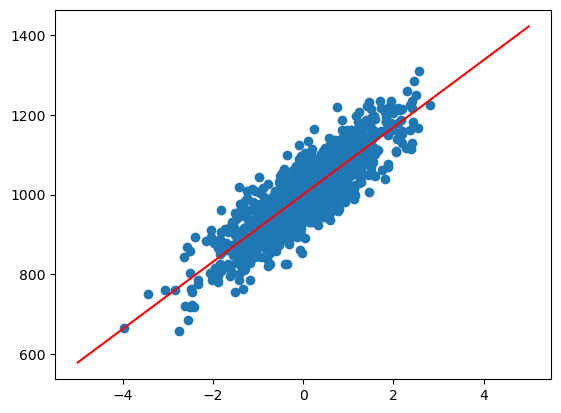

In [13]:
plt.plot([-5, 5], [-5*w1+w0, 5*w1+w0], color='r')
plt.scatter(x_train, y_train)
plt.show()